In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("./dataset.csv")
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [21]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, mean_squared_error, r2_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [22]:
label_encoder = LabelEncoder()

In [23]:
model_df = df.drop(['Attrition', 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 1)
Y = label_encoder.fit_transform(df.loc[:, 'Attrition'])

In [24]:
x_categorical = model_df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = model_df.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)

In [25]:
# load different preprocessing classes and functions 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,normalize         
# source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 
# source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

preprocessing:dict={'MinMaxScaler-0':{'class':MinMaxScaler,'attributes':{'feature_range':(0,1)}},# MinMaxScaler for feature range 0 and 1
                    'MinMaxScaler-1':{'class':MinMaxScaler,'attributes':{'feature_range':(-1,1)}},# MinMaxScaler for feature range -1 and 1
                    'StandardScaler':{'class':StandardScaler,'attributes':dict()},# StandardScaler
                    'normalize-0':{'function':normalize,'attributes':{'norm':'l2','axis':1}},# normalize finction for l2 normalization for sample wise
                    'normalize-1':{'function':normalize,'attributes':{'norm':'l1','axis':1}},# normalize finction for l1 normalization for sample wise
                    'normalize-3':{'function':normalize,'attributes':{'norm':'max','axis':1}},# normalize finction for max normalization for sample wise
                    'normalize-2':{'function':normalize,'attributes':{'norm':'l2','axis':0}},# normalize finction for l2 normalization for feature wise
                    'normalize-3':{'function':normalize,'attributes':{'norm':'l1','axis':0}},# normalize finction for l1 normalization for feature wise
                    'normalize-2':{'function':normalize,'attributes':{'norm':'max','axis':0}},# normalize finction for max normalization for feature wise
                    'No-Preprocessing':{'none':'none','attributes':dict()}      # no preprocessing applied 
}

In [60]:
def plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, ax=ax1, cmap='GnBu', fmt='g')
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, ax= ax2, cmap='GnBu', fmt='g')
    
    ax1.set_title('Training Confusion Matrix')
    ax2.set_title('Testing Confusion Matrix')
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [61]:
def get_accuracy_score(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*25, end='')
    print("Training Accuracy", end='')
    print("="*25)
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(clf_report)
    print(f"ACCURACY SCORE: {accuracy_score(y_train, y_train_pred):.4f}")
    print("="*25, end='')
    print("Testing Accuracy", end='')
    print("="*25)
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(clf_report)
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print("="*50)
    plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

# Random Forest

In [36]:
max_features = [0.2, 0.6, 1.0]
max_samples = [0.5, 0.75, 1.0]
oob=[True, False]

In [37]:
param_grid = {'max_features': max_features, 'max_samples' : max_samples, 'oob_score': oob }

=========================Training Accuracy=========================
                    0           1  accuracy    macro avg  weighted avg
precision    0.950276    1.000000  0.956268     0.975138      0.958443
recall       1.000000    0.733728  0.956268     0.866864      0.956268
f1-score     0.974504    0.846416  0.956268     0.910460      0.953467
support    860.000000  169.000000  0.956268  1029.000000   1029.000000
ACCURACY SCORE: 0.9563
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.884892   0.833333  0.882086    0.859113      0.876942
recall       0.989276   0.294118  0.882086    0.641697      0.882086
f1-score     0.934177   0.434783  0.882086    0.684480      0.857173
support    373.000000  68.000000  0.882086  441.000000    441.000000
ACCURACY SCORE: 0.8821


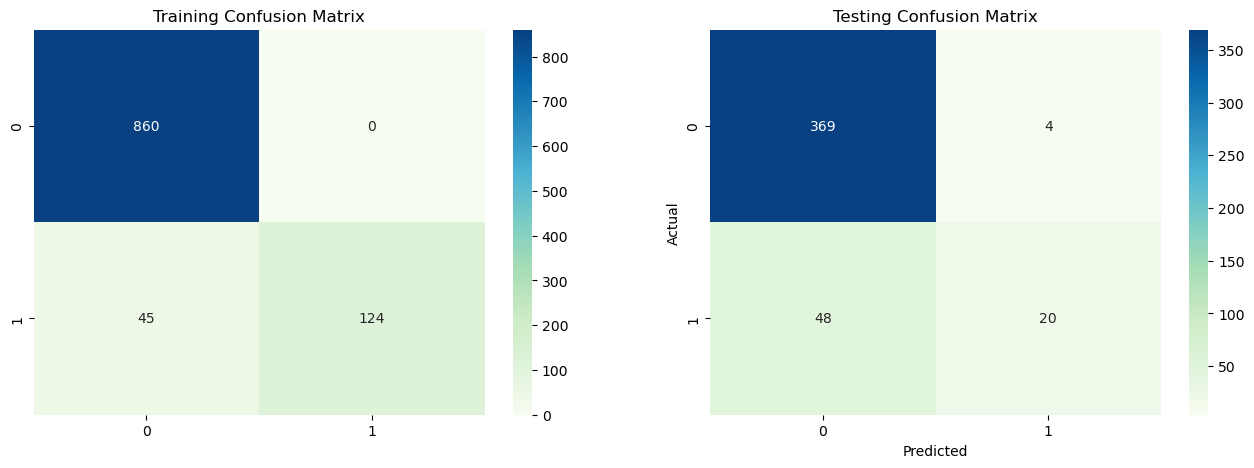

=========================Training Accuracy=========================
                    0          1  accuracy    macro avg  weighted avg
precision    0.951807    1.00000   0.95724     0.975904      0.959301
recall       1.000000    0.72500   0.95724     0.862500      0.957240
f1-score     0.975309    0.84058   0.95724     0.907944      0.954360
support    869.000000  160.00000   0.95724  1029.000000   1029.000000
ACCURACY SCORE: 0.9572
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.849412   0.812500  0.848073    0.830956      0.842967
recall       0.991758   0.168831  0.848073    0.580295      0.848073
f1-score     0.915082   0.279570  0.848073    0.597326      0.804120
support    364.000000  77.000000  0.848073  441.000000    441.000000
ACCURACY SCORE: 0.8481


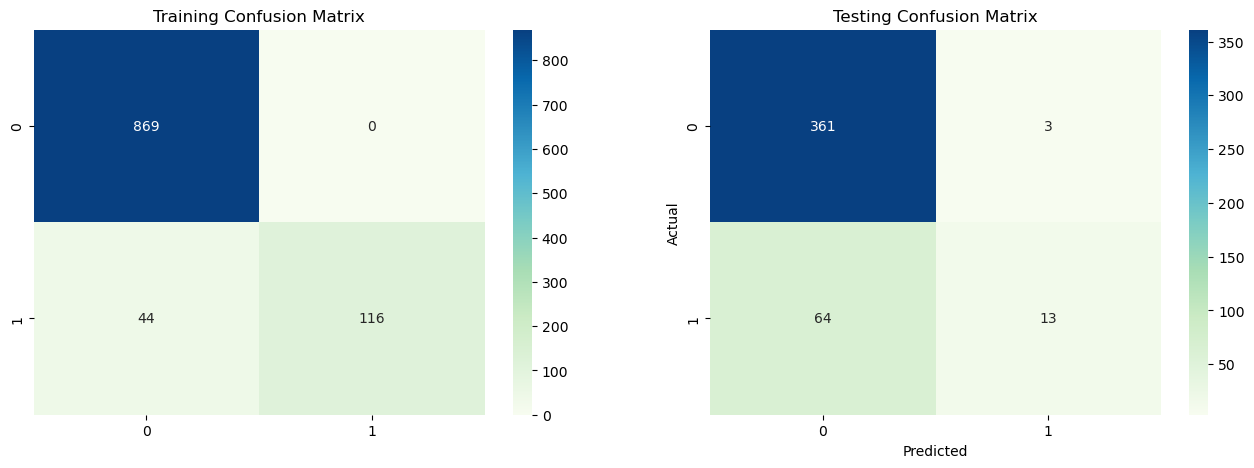

=========================Training Accuracy=========================
                    0           1  accuracy    macro avg  weighted avg
precision    0.955457    1.000000  0.961127     0.977728      0.962859
recall       1.000000    0.766082  0.961127     0.883041      0.961127
f1-score     0.977221    0.867550  0.961127     0.922385      0.958996
support    858.000000  171.000000  0.961127  1029.000000   1029.000000
ACCURACY SCORE: 0.9611
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.881643   0.629630  0.866213    0.755636      0.843926
recall       0.973333   0.257576  0.866213    0.615455      0.866213
f1-score     0.925222   0.365591  0.866213    0.645407      0.841468
support    375.000000  66.000000  0.866213  441.000000    441.000000
ACCURACY SCORE: 0.8662


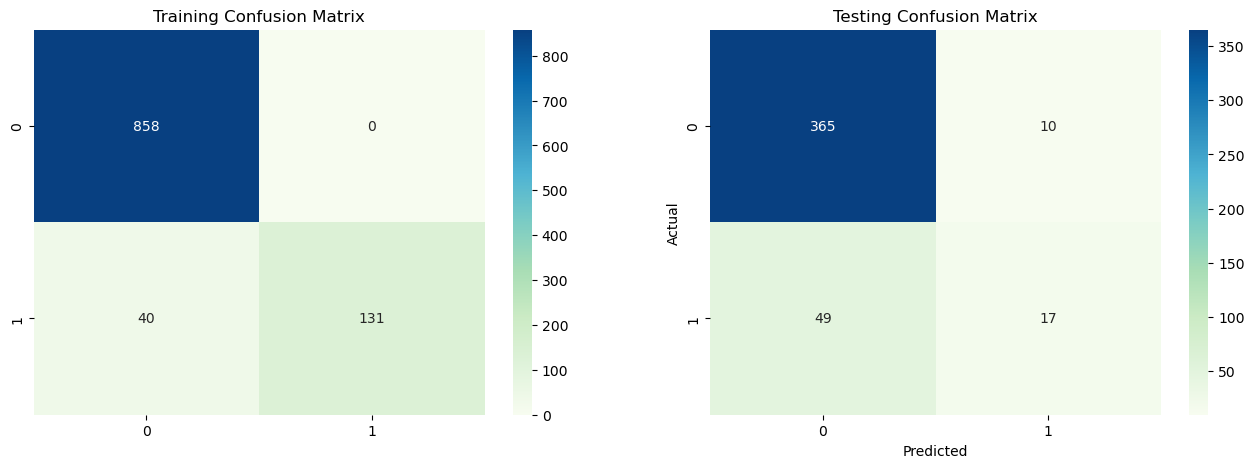

=========================Training Accuracy=========================
                    0           1  accuracy    macro avg  weighted avg
precision    0.995354    1.000000  0.996113     0.997677      0.996131
recall       1.000000    0.976744  0.996113     0.988372      0.996113
f1-score     0.997672    0.988235  0.996113     0.992954      0.996094
support    857.000000  172.000000  0.996113  1029.000000   1029.000000
ACCURACY SCORE: 0.9961
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.874408   0.631579  0.863946    0.752993      0.838617
recall       0.981383   0.184615  0.863946    0.582999      0.863946
f1-score     0.924812   0.285714  0.863946    0.605263      0.830614
support    376.000000  65.000000  0.863946  441.000000    441.000000
ACCURACY SCORE: 0.8639


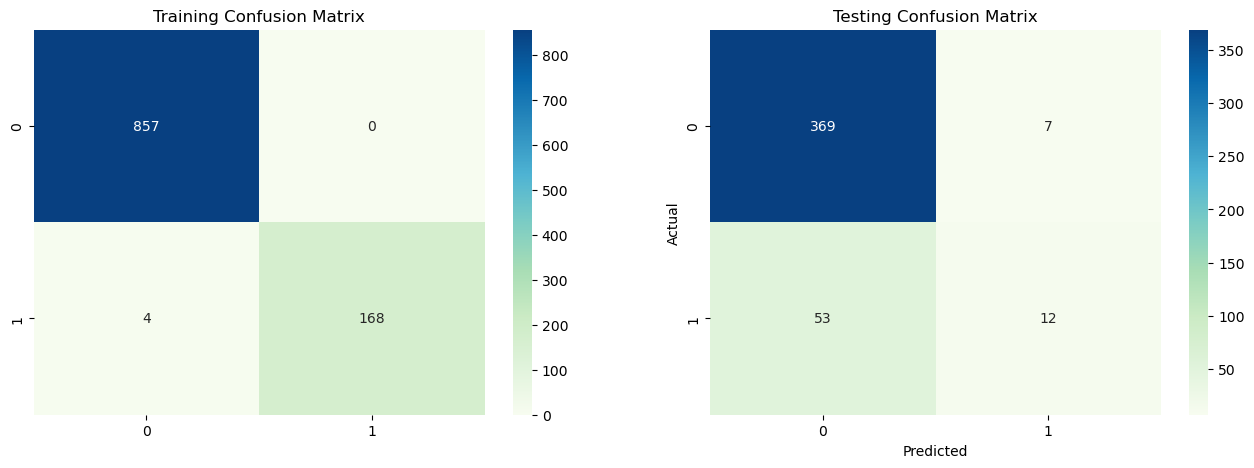

=========================Training Accuracy=========================
                    0           1  accuracy    macro avg  weighted avg
precision    0.944934    1.000000  0.951409     0.972467      0.954085
recall       1.000000    0.707602  0.951409     0.853801      0.951409
f1-score     0.971687    0.828767  0.951409     0.900227      0.947937
support    858.000000  171.000000  0.951409  1029.000000   1029.000000
ACCURACY SCORE: 0.9514
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.876812   0.555556  0.857143    0.716184      0.828732
recall       0.968000   0.227273  0.857143    0.597636      0.857143
f1-score     0.920152   0.322581  0.857143    0.621366      0.830720
support    375.000000  66.000000  0.857143  441.000000    441.000000
ACCURACY SCORE: 0.8571


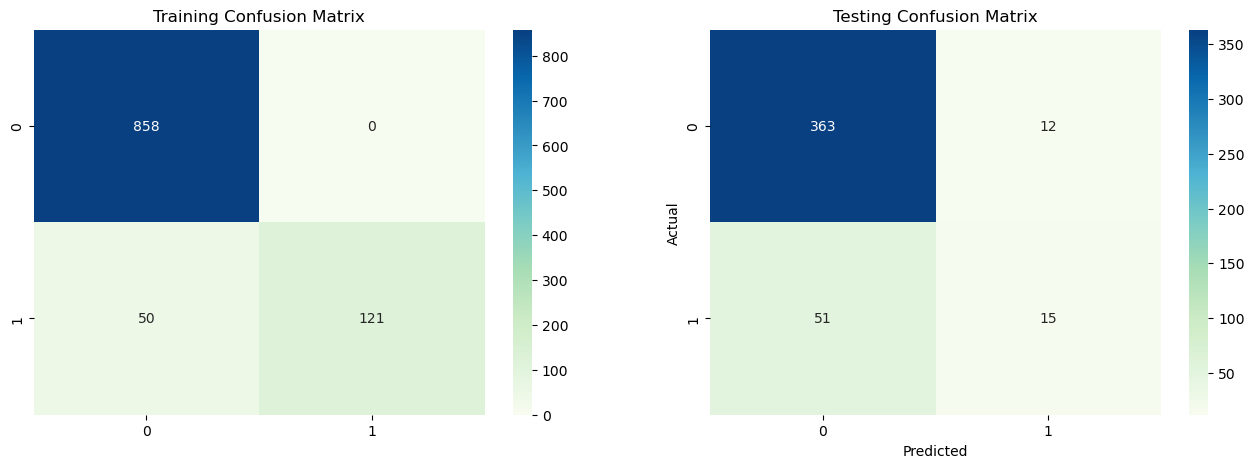

=========================Training Accuracy=========================
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    864.0  165.0       1.0     1029.0        1029.0
ACCURACY SCORE: 1.0000
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.858513   0.541667   0.84127    0.700090      0.806783
recall       0.970190   0.180556   0.84127    0.575373      0.841270
f1-score     0.910941   0.270833   0.84127    0.590887      0.806434
support    369.000000  72.000000   0.84127  441.000000    441.000000
ACCURACY SCORE: 0.8413


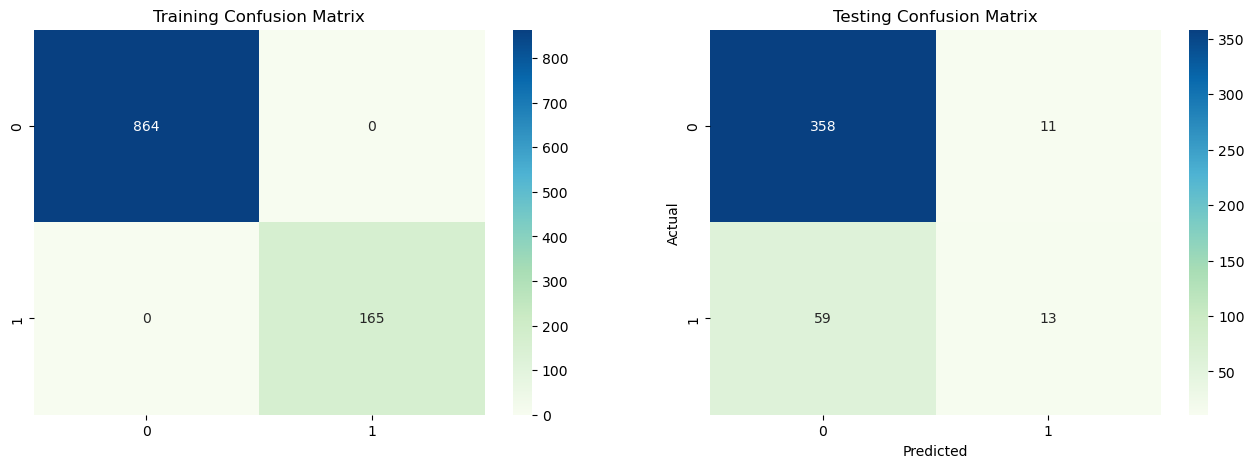

=========================Training Accuracy=========================
                    0           1  accuracy    macro avg  weighted avg
precision    0.996532    1.000000  0.997085     0.998266      0.997095
recall       1.000000    0.982036  0.997085     0.991018      0.997085
f1-score     0.998263    0.990937  0.997085     0.994600      0.997074
support    862.000000  167.000000  0.997085  1029.000000   1029.000000
ACCURACY SCORE: 0.9971
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.876513   0.678571  0.863946    0.777542      0.845094
recall       0.975741   0.271429  0.863946    0.623585      0.863946
f1-score     0.923469   0.387755  0.863946    0.655612      0.838435
support    371.000000  70.000000  0.863946  441.000000    441.000000
ACCURACY SCORE: 0.8639


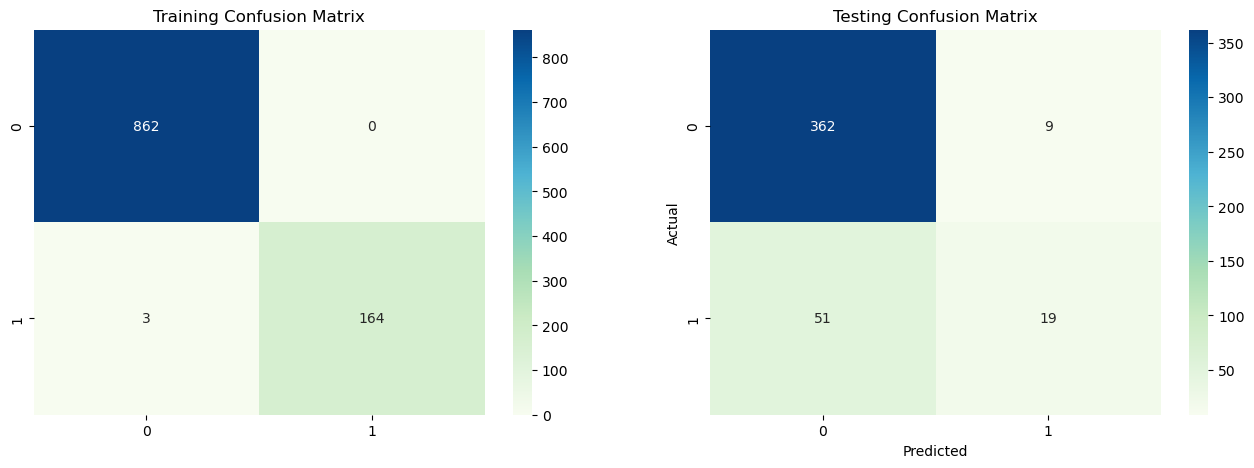

=========================Training Accuracy=========================
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    857.0  172.0       1.0     1029.0        1029.0
ACCURACY SCORE: 1.0000
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.867925   0.529412  0.854875    0.698668      0.818030
recall       0.978723   0.138462  0.854875    0.558592      0.854875
f1-score     0.920000   0.219512  0.854875    0.569756      0.816753
support    376.000000  65.000000  0.854875  441.000000    441.000000
ACCURACY SCORE: 0.8549


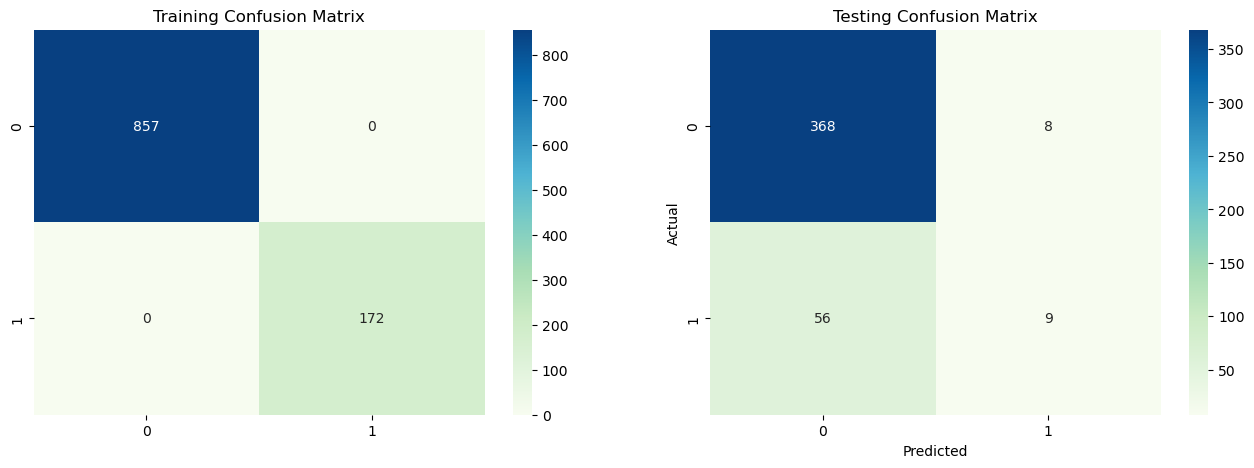

In [62]:
for preprocessing_type in preprocessing:                                        # make loop to apply each preprocessing type 
  if 'class' in preprocessing[preprocessing_type]:                              # object have to be made of preprocessing class (for MinMaxScaler and StandardScaler)
    class_object=preprocessing[preprocessing_type]['class'](**preprocessing[preprocessing_type]['attributes'])# make object with given arguments 
    X_preprocessed:np.ndarray=class_object.fit_transform(x,Y)                   # apply preprocessing on inputs (X)
  elif 'function' in preprocessing[preprocessing_type]:                         # apply function perprocessing with default arguments (for normalize)
    X_preprocessed:np.ndarray=preprocessing[preprocessing_type]['function'](x,**preprocessing[preprocessing_type]['attributes'])# make apply function with given arguments
  else:                                                                         # if no-perprocessing have to be applied 
    X_preprocessed:np.ndarray=x.to_numpy()
      
  X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, Y, test_size=0.3)
    
  model_search = GridSearchCV(estimator=RandomForestClassifier(n_estimators=120), param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)
    
  model_search.fit(X_train, y_train)
  get_accuracy_score(model_search, X_train, X_test, y_train, y_test)